# Capstone 2 Exploratory Data Analysis

## Table of Contents<a id='Table_of_Contents'></a>
* [2 Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [2.1 Imports](#Imports)
        * [2.1.1 Import Libraries](#Import_Libraries)
        * [2.1.2 Import Data](#Import_Data)          
    
    * [2.2 Visualizing Churn Across Features](#Visualizing_Churn_Across_Features)
        * [2.2.1 Categorical Features](#Categorical_Features)
        * [2.2.2 Numerical Features](#Numerical_Features)
        * [2.2.3 Churn, Auto-Renew, and Price](#Churn_Auto-Renew_and_Price)
        * [2.2.4 Churn by Registration Date](#Churn_by_Registration_Date)
        
    * [2.3 Feature Correlation Heatmap](#Feature_Correlation_Heatmap)
    
    * [2.4 Pricing and Revenue](#Pricing_and_Revenue)
        * [2.4.1 Impact of Cost on Churn](#Impact_of_Cost_on_Churn)
        * [2.4.2 Revenue and New Users](#Revenue_and_New_Users)
    
    * [2.5 Primary Components Analysis](#Primary_Components_Analysis)
    
    * [2.6 Insights](#Insights)
        * [2.6.1 Recommendations](#Recommendations)
        * [2.6.2 Revenue and Pricing](#Revenue_and_Pricing)
        * [2.6.3 Modeling Insights](#Modeling_Insights)
        * [2.6.4 Additional Insights](#Additional_Insights)
       
    

## 2.1 Imports<a id='Imports'></a>

### 2.1.1 Import Libraries<a id='Import_Libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### 2.1.2 Import Data<a id='Import_Data'></a>

In [2]:
# Read in data
data = pd.read_csv("../data/processed/combined.csv")

In [3]:
# convert features to correct type
date_features = ["transaction_date", "membership_expire_date", "registration_init_time"]
cat_features = ["gender", "payment_method_id", "city", "registered_via"]
data = data.astype({col:"datetime64[ns]" for col in date_features})
data = data.astype({col:str for col in cat_features})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599990 entries, 0 to 599989
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    599990 non-null  object        
 1   transaction_date        599990 non-null  datetime64[ns]
 2   is_churn                599990 non-null  int64         
 3   payment_method_id       599990 non-null  object        
 4   payment_plan_days       599990 non-null  int64         
 5   plan_list_price         599990 non-null  int64         
 6   actual_amount_paid      599990 non-null  int64         
 7   is_auto_renew           599990 non-null  int64         
 8   membership_expire_date  599990 non-null  datetime64[ns]
 9   is_cancel               599990 non-null  int64         
 10  city                    599990 non-null  object        
 11  age                     599990 non-null  int64         
 12  gender                  599990

In [4]:
data.shape

(599990, 23)

In [5]:
data.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,++6xEqu4JANaRY4GjEfEFtLtqOvZvYPyP3uk/PW9Ces=,2017-03-31,0,41,30,99,99,1,2017-04-30,0,...,7,2016-05-01,9,18,3,0,2,38,53,9541.349
1,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,2017-03-31,0,39,30,149,149,1,2017-05-24,0,...,3,2012-06-03,21,62,15,5,7,205,172,57832.941
2,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,2017-03-26,0,30,30,149,149,1,2017-04-26,0,...,9,2014-11-18,28,46,13,12,14,395,437,104319.610
3,++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=,2017-03-31,0,39,30,149,149,1,2017-05-18,0,...,9,2011-02-05,25,77,35,29,17,440,339,115120.269
4,++Ve6PtJ8HDzBYbkuwGkmNrXdOk7ZLfTATtE6G/mX/U=,2017-03-31,0,34,30,149,149,1,2017-04-30,0,...,9,2008-03-23,4,64,9,10,5,58,137,20449.617


## 2.2 Visualizing Churn Across Features<a id="Visualizing_Churn_Across_Features"></a>

### 2.2.1 Categorical Features<a id="Categorical_Features"></a>

Let's explore the percentage of subscribers that churn for each value in the categorical features. 

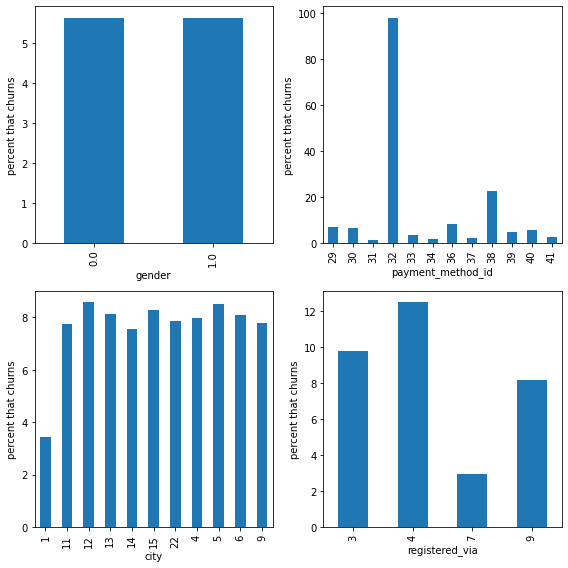

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, feature in enumerate(cat_features): 
    churn_pct_by_feature = (data.groupby(by=feature).is_churn.sum() / data[feature].value_counts())*100
    churn_pct_by_feature.plot(kind="bar", ax=axs[i], xlabel=feature, ylabel="percent that churns")

plt.tight_layout()
plt.show();

* Almost 100% of the subscribers who payed with payment method id 32 churned
* Subscribers from city 1 (which is also the most populous) are the least likely to churn
* There is no correlation between gender and likelyhood of churning
* Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers churned that registered with other methods 

### 2.2.2 Numerical Features<a id="Numerical_Features"></a>

Are subscribers who spend more time on the app more likely to renew or churn? 

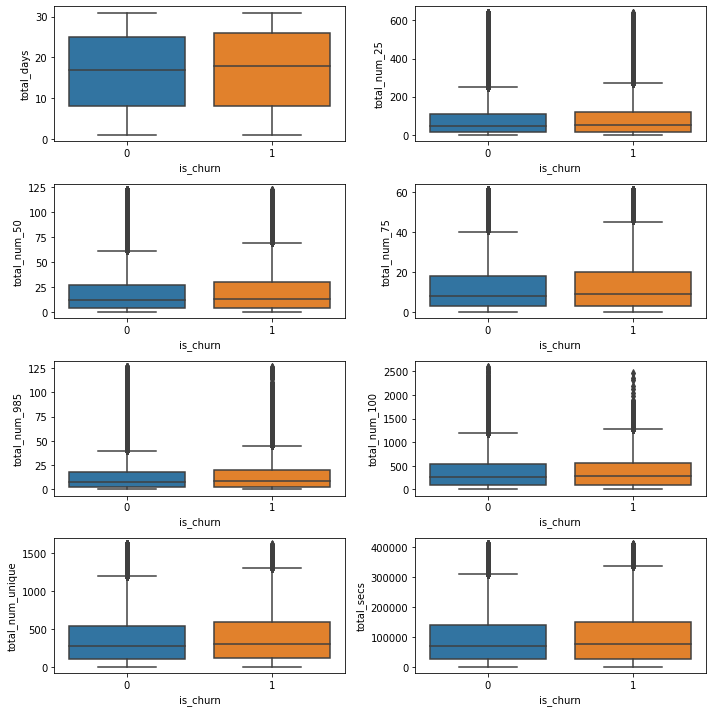

In [7]:
num_features = ["total_days", "total_num_25", "total_num_50", "total_num_75", 
                "total_num_985", "total_num_100", "total_num_unique", "total_secs"]

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs = axs.flatten()
for i, feature in enumerate(num_features): 
    sns.boxplot(x="is_churn", y=feature, data=data, ax=axs[i])

plt.tight_layout()
plt.show();

Listening behavior appears to have very little to do with whether or not a subscriber churns. Subscribers that churn and subscribers that renew use the service at the same rates. 

### 2.2.3 Churn, Auto-Renew, and Price<a id="Churn_Auto-Renew_and_Price"></a>

Are customers who sign up for auto-renew more or less likely to churn? How does plan price and amount paid affect that decision? 

In [8]:
# Get the counts 
top_left = format(sum((data.is_auto_renew==0) & (data.is_churn==0)), (",d"))
top_right = format(sum((data.is_auto_renew==1) & (data.is_churn==0)), (",d"))
bottom_left = format(sum((data.is_auto_renew==0) & (data.is_churn==1)), (",d"))
bottom_right = format(sum((data.is_auto_renew==1) & (data.is_churn==1)), (",d"))

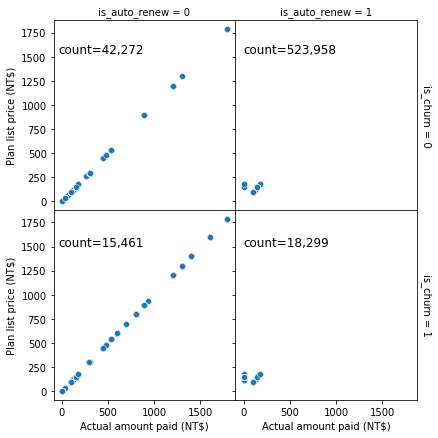

In [9]:
g = sns.FacetGrid(data=data, col="is_auto_renew", row="is_churn", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="actual_amount_paid", y="plan_list_price")
g.set_axis_labels("Actual amount paid (NT$)", "Plan list price (NT$)")

# add counts to FacetGrid
plt.text(0,1500,"count="+bottom_right, size=12)
plt.text(-2000,1500,"count="+bottom_left, size=12)
plt.text(-2000,3500,"count="+top_left, size=12)
plt.text(0,3500,"count="+top_right, size=12)
g.fig.subplots_adjust(wspace=0, hspace=0);

 * The first thing that stands out is that subscribers who did not sign up for auto-renew paid higher prices for the service. This is most likely because they paid for plans lasting several months or a year, while those who signed up for auto-renew chose to pay on a month-to-month basis.     
* All the subscribers that did not sign up for auto-renew paid the listed price, while some of the customers who signed up for auto-renew paid less than the listed price. 
    * There appears to have been a promotion where subscribers who signed up for auto-renew got a discount. Was this promotion effective? Let's get the exact numbers of subscribers who got a discount, and count how many churned.

In [10]:
discount = data[data.actual_amount_paid < data.plan_list_price]
discount.shape

(634, 23)

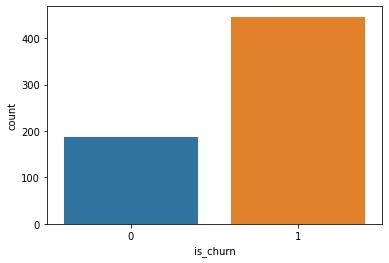

In [11]:
sns.countplot(data=discount, x="is_churn");

In March 2017, more subscribers who got a discount churned than renewed.

### 2.2.4 Churn by Registration Date<a id="Churn_by_Registration_Date"></a>

Our churn data is from March 2017. Let's take a look at the registration date of customers who did not renew the service that month. 

In [12]:
churn_by_reg_date = pd.DataFrame(data.groupby(by="registration_init_time").is_churn.sum())
total_count = data.groupby("registration_init_time").is_churn.count()
churn_by_reg_date["percent_churn"] = (churn_by_reg_date.is_churn/total_count)*100
churn_by_reg_date = churn_by_reg_date.drop("is_churn", axis=1).sort_index().reset_index()

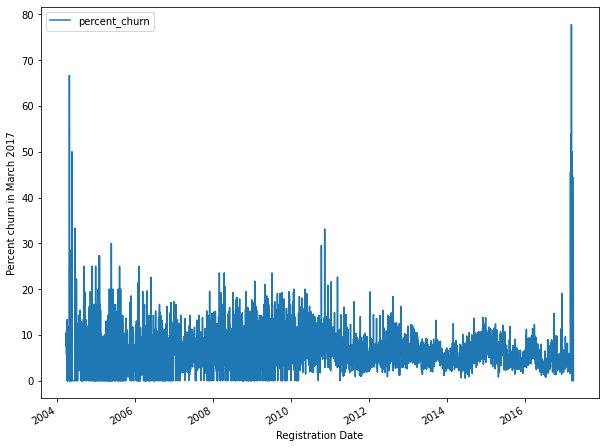

In [13]:
churn_by_reg_date.set_index("registration_init_time").plot(figsize=(10,8))
plt.xlabel("Registration Date")
plt.ylabel("Percent churn in March 2017")
plt.show();

In [14]:
spikes = churn_by_reg_date[churn_by_reg_date["percent_churn"] > 40]
spikes

,registration_init_time,percent_churn
30,2004-04-25,66.666667
54,2004-05-19,50.000000
4716,2017-03-03,45.454545
4719,2017-03-06,53.846154
4725,2017-03-12,77.777778
4727,2017-03-14,50.000000
4732,2017-03-19,50.000000
4737,2017-03-24,44.444444


* There are major spikes of subscribers churning that registered in 2004 and 2017. 
    * The subcribers that registered and then churned in March 2017 appear to be first-time users. Further analysis should be done with churn data from other months to detect if having this many first-time users churn is common. 
    * The subscribers that churn in March 2017 but registered in 2004 are unexpected. Further analysis should be done on changes that have been made recently to the app interface or pricing to determine what caused so many long-time subscribers to churn in March 2017. 
    
KKBox was founded in October 2004 (source: https://en.wikipedia.org/wiki/KKBox). Let's take a look at these original users. 

In [15]:
# isolate original users that registered in 2004
original_users = data.copy()
original_users = original_users[original_users["registration_init_time"].dt.year==2004]
original_users.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
26,+0nSx/BUYJz95M7Gu8kHn3l6khpqocMmzoExCzsRf9A=,2017-03-01,0,37,30,149,149,1,2017-04-03,0,...,9,2004-09-03,16,43,14,12,8,258,302,70313.471
27,+0qp8s9V3eIIPGNZpQzmFNOetFXHApbV7WGgVXcisCY=,2017-03-31,0,34,30,149,149,1,2017-04-30,0,...,9,2004-09-05,2,3,1,0,0,22,26,5085.366
70,+40AbtgttyyrM+LwjLROnbjPROq1dtIcIKRf7hIRAvE=,2017-03-28,0,29,30,180,180,1,2017-04-28,0,...,9,2004-07-26,11,34,16,11,10,89,125,30421.882
131,+8dDfvcPB2w6jBoSd9c6g/RGdYqM5hF97DhXHq3FDjQ=,2017-03-09,0,36,30,180,180,1,2017-04-08,0,...,9,2004-07-08,18,18,8,8,6,404,194,111152.016
159,+AsTZ45UZIHTpKlI0s83lBxt+K3oVqzygOrwD0GjrZk=,2017-03-31,0,34,30,149,149,1,2017-04-30,0,...,9,2004-07-16,2,16,6,0,0,16,30,4957.586


In [16]:
original_users.shape

(5707, 23)

In [17]:
# percent of users registered in 2004 that churn
(original_users.is_churn.value_counts()[1] / original_users.shape[0])*100

7.096548098826003

In [18]:
# percent of all users that churn
(data.is_churn.value_counts()[1] / data.shape[0])*100

5.626760446007433

The percent of original subscribers that churned in March 2017 is about 1.4% higher than the percent of overall subscribers that churned in March 2017. 

In [19]:
# percent of users that registered in March 2017 that churned
first_time = data[(data["registration_init_time"].dt.year==2017) & (data["registration_init_time"].dt.month==3)]
(first_time.is_churn.value_counts()[1] / first_time.shape[0])*100

18.22125813449024

About 18% of subscribers who registered in March 2017 churned. 

### 2.2.5 Churn by Age<a id="Churn_by_Age"></a>

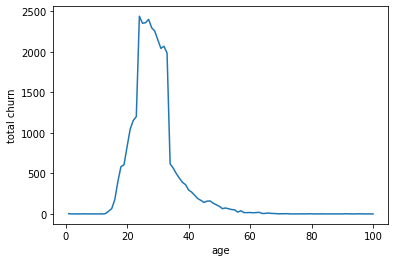

In [20]:
# Plot the number of users that churn for each age
data.groupby("age").is_churn.sum().plot(ylabel="total churn");

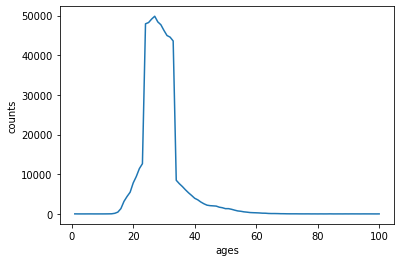

In [21]:
# Plot the number of users at each age
data.age.value_counts().sort_index().plot(xlabel="ages", ylabel="counts");

Most of the subscribers that churned were 20 to 40 years old. However, this does not tell us much, as most of the population is in the 20-40 age group.

In the Data Wrangling step, we replaced about 300,000 missing age values with values between 24 and 34, which was the 25th percentile and 75th percentile respectively of the data that was available.

Age alone should not be used as an indicator of whether or not a user will churn.

## 2.3 Feature Correlation Heatmap<a id="Feature_Correlation_Heatmap"></a>

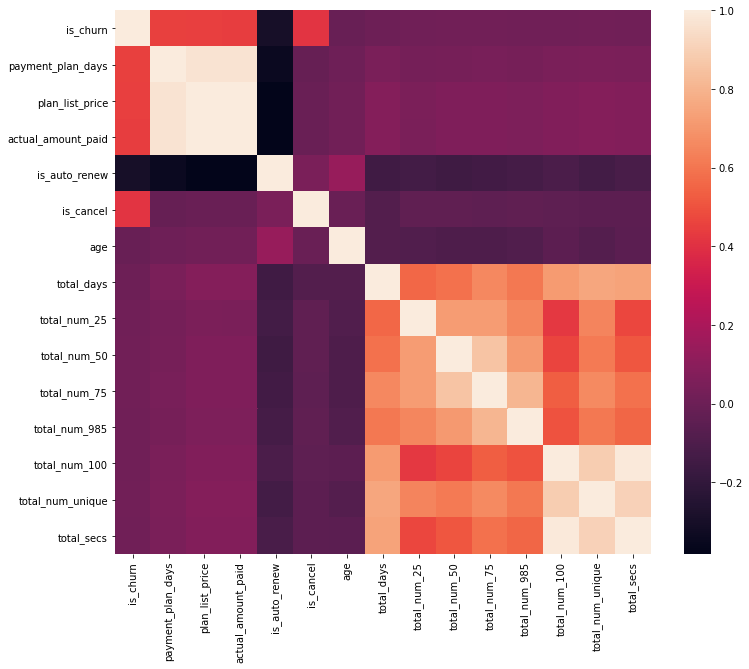

In [22]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

* The payment data and the user listening data is highly correlated, as expected. 
* membership_expire_date and is_cancel are used to compute churn, so it is not surprising that these features are correlated.
* There is an interesting correlation between payment_plan_days, plan_list_price, actual_amount_paid, and is_churn. 

## 2.5 Pricing and Revenue<a id="Pricing_and_Revenue"></a>

### 2.5.1 Impact of Cost on Churn<a id="Impact_of_Cost_on_Churn"></a>

In [23]:
churn_avg_price = data[data.is_churn==1].actual_amount_paid.mean()
renew_avg_price = data[data.is_churn==0].actual_amount_paid.mean()
print("Average amount that subscribers who churned in March 2017 paid: {:.2f} NT$".format(churn_avg_price))
print("Average amount that subscribers who renewed in March 2017 paid: {:.2f} NT$".format(renew_avg_price))
print("Overall average payment: {:.2f} NT$".format(data.actual_amount_paid.mean()))

Average amount that subscribers who churned in March 2017 paid: 395.99 NT$
Average amount that subscribers who renewed in March 2017 paid: 131.73 NT$
Overall average payment: 146.60 NT$


This is an important revelation - the average amount that subscribers who churned in March 2017 paid is triple the amount that subscribers who renewed paid. 

In [24]:
churn_plan_days = data[data.is_churn==1].payment_plan_days.mean()
renew_plan_days = data[data.is_churn==0].payment_plan_days.mean()
print("Average number of days that subscribers who churned in March 2017 subscribed for: %d days" % churn_plan_days)
print("Average number of days that subscribers who renewed in March 2017 subscribed for: %d days" % renew_plan_days)
print("Overall average number of days: %d days" % data.payment_plan_days.mean())

Average number of days that subscribers who churned in March 2017 subscribed for: 93 days
Average number of days that subscribers who renewed in March 2017 subscribed for: 30 days
Overall average number of days: 33 days


Subscribers who churned had subscribed for more than three times the number of days than subscribers who renewed.

### 2.5.2 Revenue and New Users<a id="Revenue_and_New_Users"></a>

In [25]:
# Find subscription revenue from March
march_revenue = data[data.is_churn==0].actual_amount_paid.sum()
print("Subscription revenue from March 2017:", f'{march_revenue:,}', "NT$")

Subscription revenue from March 2017: 74,589,501 NT$


In [26]:
# Find how much subscription revenue was lost in March due to churn
march_loss = data[data.is_churn==1].actual_amount_paid.sum()
print("Total loss KKBox suffered from subscribers that churned in March 2017:", f'{march_loss:,}', "NT$")

Total loss KKBox suffered from subscribers that churned in March 2017: 13,368,697 NT$


Let's take a look at the number of new users KKBox has added each month. If the number of new users is increasing month-to-month, we can reasonably expect subscription revenue to increase month to month as well. 

In [27]:
# Read in members_v3.csv file
members_df = pd.read_csv("../data/raw/members_v3.csv")
members_df.shape

(6769473, 6)

In [28]:
members_df["registration_init_time"] = pd.to_datetime(members_df["registration_init_time"], format="%Y%m%d")
monthly_new_users = {}
for year in range(2004, 2017+1):
    for month in range(1, 12+1):
        num_new_users = sum((members_df["registration_init_time"].dt.year==year) & \
                         (members_df["registration_init_time"].dt.month==month))
        monthly_new_users[(year,month)] = num_new_users

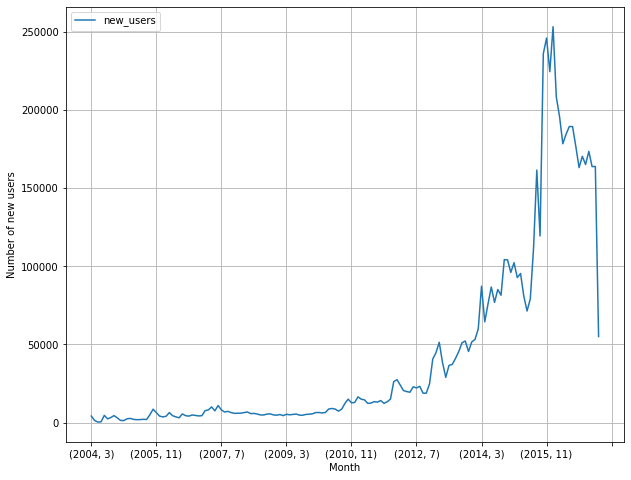

In [29]:
new_users_df = pd.DataFrame.from_dict(monthly_new_users, orient="index", columns=["new_users"])

# drop months at the extremities that have no data, as well as our current month
new_users_df = new_users_df[new_users_df.new_users>0].drop((2017,3))

new_users_df.plot(figsize=(10,8),grid=True)
plt.xlabel("Month")
plt.ylabel("Number of new users")
plt.show();

After seeing a sharp increase in new users around 2015, KKBox is now experiencing a sharp decline in new user registration. This means that it is all the more essential that the company retain subscribers. 

## 2.4 Primary Components Analysis<a id="Primary_Components_Analysis"></a>

We will use Primary Components Analysis (PCA) to visualize churn. 

In [30]:
# Remove features that cannot be used for PCA; i.e. no features that are not naturally numerical
remove = ["msno", "transaction_date", "is_churn", "payment_method_id", "is_auto_renew", 
         "membership_expire_date", "is_cancel", "city", "gender", "registered_via", 
         "registration_init_time"]

scaled_data = data.drop(remove, axis=1)
columns = scaled_data.columns

# scale data
scaled_data = scale(scaled_data)

In [31]:
# confirm the mean of scaled data is 0, and the standard deviation is 1
scaled_data_df = pd.DataFrame(scaled_data, columns=columns)
scaled_data_df.mean()

payment_plan_days     1.576247e-17
plan_list_price      -6.437624e-17
actual_amount_paid   -8.988515e-17
age                   1.013014e-16
total_days           -1.099583e-16
total_num_25         -8.266118e-18
total_num_50          5.423900e-17
total_num_75         -2.858798e-17
total_num_985         3.879628e-17
total_num_100         6.200773e-17
total_num_unique     -2.216930e-17
total_secs           -4.088057e-17
dtype: float64

In [32]:
scaled_data_df.std()

payment_plan_days     1.000001
plan_list_price       1.000001
actual_amount_paid    1.000001
age                   1.000001
total_days            1.000001
total_num_25          1.000001
total_num_50          1.000001
total_num_75          1.000001
total_num_985         1.000001
total_num_100         1.000001
total_num_unique      1.000001
total_secs            1.000001
dtype: float64

In [33]:
scaled_data_df.head()

,payment_plan_days,plan_list_price,actual_amount_paid,age,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,-0.110935,-0.346401,-0.345016,0.449336,-0.831365,-0.665248,-0.781161,-0.977638,-0.749599,-0.936954,-0.967282,-0.975419
1,-0.110935,0.016229,0.017400,0.935869,0.443730,-0.206410,-0.202701,-0.577871,-0.418104,-0.457671,-0.604495,-0.430306
2,-0.110935,0.016229,0.017400,2.233290,1.187536,-0.373260,-0.299111,-0.018197,0.045988,0.087621,0.203390,0.094433
3,-0.110935,0.016229,0.017400,-0.199374,0.868762,-0.049988,0.761400,1.341011,0.244885,0.216770,-0.095375,0.216350
4,-0.110935,0.016229,0.017400,2.557645,-1.362654,-0.185554,-0.491931,-0.178104,-0.550702,-0.879555,-0.711197,-0.852287


In [34]:
# Calculate the primary components
data_PCA = PCA().fit(scaled_data_df)

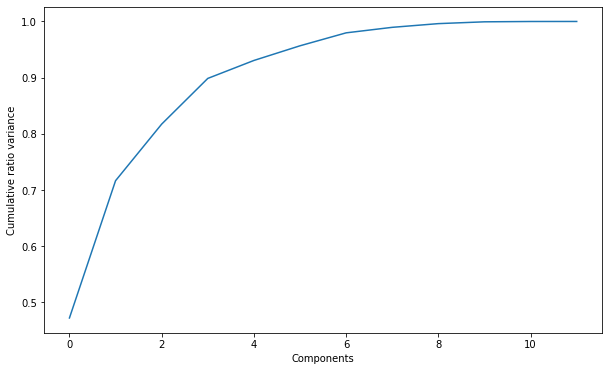

In [35]:
# Plot the cumulative sum of the primary components
plt.subplots(figsize=(10,6))
plt.plot(data_PCA.explained_variance_ratio_.cumsum())
plt.xlabel("Components")
plt.ylabel("Cumulative ratio variance")
plt.show();

In [36]:
pct_var = 100 * data_PCA.explained_variance_ratio_.cumsum()[1]
print("The first two components explain {:.2f}% of the variance.".format(pct_var))

The first two components explain 71.66% of the variance.


In [37]:
# Apply PCA transformation to data
transformed_data = data_PCA.transform(scaled_data_df)
transformed_data.shape

(599990, 12)

In [38]:
pca_df = pd.DataFrame({"PC1":transformed_data[:,0], "PC2":transformed_data[:,1], "is_churn":data.is_churn})
pca_df.head()

,PC1,PC2,is_churn
0,-2.500540,-0.196976,0
1,-0.923123,0.076018,0
2,0.239336,-0.006164,0
3,1.241218,-0.181614,0
4,-1.968211,0.201327,0


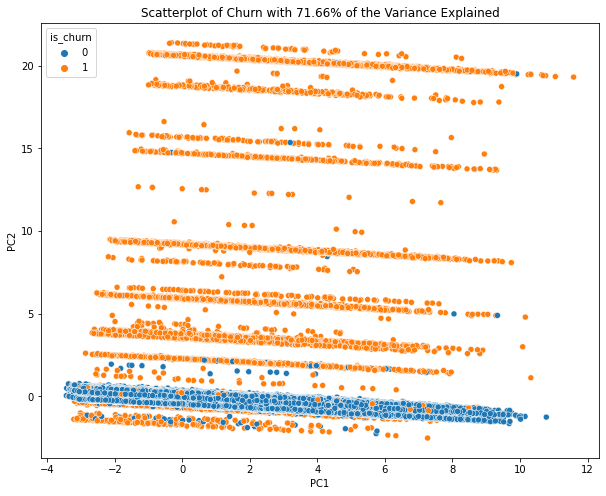

In [39]:
# plot a scatterplot of is_churn with PC1 and PC2 on the x and y axes
plt.subplots(figsize=(10,8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_churn")
plt.title("Scatterplot of Churn with {:.2f}% of the Variance Explained".format(pct_var))
plt.show();

## 2.6 Insights<a id="Insights"></a>

### 2.6.1 Recommendations<a id="Recommendations"></a>

__Payment method id 32 should no longer be used.__ 98% of subcribers that used payment method id 32 churned. This payment method should either no longer be offered as an option, or should receive some serious adjustments to its implementation strategy.

__Targeted marketing to cities where KKBox has a smaller presence could help reduce churn.__ Subscribers from city 1 are least likely to churn. City 1 is also the city most subcribers are from. A marketing strategy focused on expanding KKBox's influence and popularity in the other cities could help reduce churn.

__Registration method 7 should be used to sign up new subscribers.__ Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers that registered with other methods churned. This was also the most popular registration method, with 341,273 subcribers using method 7 to sign up for KKBox. This method should continue to be promoted as users who sign up via this method are most likely to continue using the app.

### 2.6.2 Revenue and Pricing<a id="Revenue_and_Pricing"></a>

KKBox lost about 13 million NT$ in subscription revenue due to churn in March 2017. It should be noted that subscribers who churned in this month were paying about 3 times as much as subscribers who did not. 

The number of new users added per month has increased since KKBox was founded in 2004, but is on a sharp downward trend recently. __With the number of new users added decreasing, it is all the more important to discover ways to keep current subscribers.__ 

Perhaps the most significant insight is around price. The average amount that subscribers who churned in March 2017 paid is triple the amount that subscribers who renewed paid. Users appear to prefer cheaper plans with shorter durations over more expensive plans that last several months.


### 2.6.3 Modeling Insights<a id="Modeling_Insights"></a>

On the scatterplot of churn graphed using PCA components, a clear separation emerges between users that churn and users that don't. This is a positive sign that our model will be able to accurately categorize subscribers. However, this plot does expose some potential challenges around false negatives. 

We will be evaluating models based on recall, as we are most concerned about false negatives: situations where a user that is likely to churn is miss-classified. The scatterplot shows that there are several orange points (churn = 1) that overlap in the mass of blue points (churn = 0), and that there is a large cluster of these orange points just below the main cluster of blue points. __A linear decision boundary would miss-classify these points.__ This should be kept in mind when selecting and evaluating models. 

### 2.6.4 Additional Insights<a id="Additional_Insights"></a>

* __Neither age nor gender appear to be correlated with likelyhood of churning.__ 
    * Ads that target a certain age group or gender might lead to an increase in new subscriptions, but it is unlikely to have an effect on rentaining current subscribers. 


* __Listening behavior has very little to do with whether or not a subscriber churns.__ 
    * Subscribers that churn and subscribers that renew use the service at the same rates. 
    * Encouraging subscribers to interact with the app more through notifications or ads is unlikely to reduce churn. 


* __The auto-renew option did not help reduce churn in March 2017.__ 
    * In fact, slightly more users who churned also had also signed up for auto-renew. 
    * Nonetheless, we should compare the retention rate of subscribers who use auto-renew over several months before determining whether or not it is effective at reducing churn. 


* __70% of subscribers who got a discount churned.__
    * Only 634 subscribers got a discount. This is a relatively small sample size to draw any definite conclusions. Like with auto-renew, we need to compare the retention rate of subscribers who recieve discounts over time and with a larger sample size before we can make a definitve argument that discounts do not help retain customers. 


* __Of KKBox's original subcribers (those who subscribed when the company was founded in 2004), 7.4% churned - 1.4% higher than the overall percentage__
    * More research should be done on recent app updates or changes to pricing plans that caused these long-term subscribers to abandon the service. 
    
    
* __18% of subscribers who registered in March 2017 churned.__ 
    * More research should be done with churn data from other months to see if having this many subscribers churn is common, or if something changed in March 2017 that caused so many first-time users to churn. 

In [53]:
# save dtypes to be used later on
data.dtypes.reset_index().to_csv("../data/processed/dtype_map.csv", index=False, header=["feature","type"])